Our code for LSB is based on this code: https://github.com/kelvins/steganography

In [0]:
from PIL import Image
img1 = 'bea1.jpg'
img2 = 'cdmc276.jpg'
merged_image = Steganography.merge(Image.open(img1), Image.open(img2))
unmerged_image = Steganography.unmerge(merged_image)


In [2]:
class Steganography(object):

    @staticmethod
    def __int_to_bin(rgb):
        """Convert an integer tuple to a binary (string) tuple.

        :param rgb: An integer tuple (e.g. (220, 110, 96))
        :return: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        """
        r, g, b = rgb
        return ('{0:08b}'.format(r),
                '{0:08b}'.format(g),
                '{0:08b}'.format(b))

    @staticmethod
    def __bin_to_int(rgb):
        """Convert a binary (string) tuple to an integer tuple.

        :param rgb: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        :return: Return an int tuple (e.g. (220, 110, 96))
        """
        r, g, b = rgb
        return (int(r, 2),
                int(g, 2),
                int(b, 2))

    @staticmethod
    def __merge_rgb(rgb1, rgb2):
        """Merge two RGB tuples.

        :param rgb1: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        :param rgb2: Another string tuple
        (e.g. ("00101010", "11101011", "00010110"))
        :return: An integer tuple with the two RGB values merged.
        """
        r1, g1, b1 = rgb1
        r2, g2, b2 = rgb2
        rgb = (r1[:4] + r2[:4],
               g1[:4] + g2[:4],
               b1[:4] + b2[:4])
        return rgb

    @staticmethod
    def merge(img1, img2):
        """Merge two images. The second one will be merged into the first one.

        :param img1: First image
        :param img2: Second image
        :return: A new merged image.
        """

        # Check the images dimensions
        if img2.size[0] > img1.size[0] or img2.size[1] > img1.size[1]:
            raise ValueError('Image 2 should not be larger than Image 1!')

        # Get the pixel map of the two images
        pixel_map1 = img1.load()
        pixel_map2 = img2.load()

        # Create a new image that will be outputted
        new_image = Image.new(img1.mode, img1.size)
        pixels_new = new_image.load()

        for i in range(img1.size[0]):
            for j in range(img1.size[1]):
                rgb1 = Steganography.__int_to_bin(pixel_map1[i, j])

                # Use a black pixel as default
                rgb2 = Steganography.__int_to_bin((0, 0, 0))

                # Check if the pixel map position is valid for the second image
                if i < img2.size[0] and j < img2.size[1]:
                    rgb2 = Steganography.__int_to_bin(pixel_map2[i, j])

                # Merge the two pixels and convert it to a integer tuple
                rgb = Steganography.__merge_rgb(rgb1, rgb2)

                pixels_new[i, j] = Steganography.__bin_to_int(rgb)

        return new_image

    @staticmethod
    def unmerge(img):
        """Unmerge an image.

        :param img: The input image.
        :return: The unmerged/extracted image.
        """

        # Load the pixel map
        pixel_map = img.load()

        # Create the new image and load the pixel map
        new_image = Image.new(img.mode, img.size)
        pixels_new = new_image.load()

        # Tuple used to store the image original size
        original_size = img.size

        for i in range(img.size[0]):
            for j in range(img.size[1]):
                # Get the RGB (as a string tuple) from the current pixel
                r, g, b = Steganography.__int_to_bin(pixel_map[i, j])

                # Extract the last 4 bits (corresponding to the hidden image)
                # Concatenate 4 zero bits because we are working with 8 bit
                rgb = (r[4:] + '0000',
                       g[4:] + '0000',
                       b[4:] + '0000')

                # Convert it to an integer tuple
                pixels_new[i, j] = Steganography.__bin_to_int(rgb)

                # If this is a 'valid' position, store it
                # as the last valid position
                if pixels_new[i, j] != (0, 0, 0):
                    original_size = (i + 1, j + 1)

        # Crop the image based on the 'valid' pixels
        new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

        return new_image

# Display the merged and unmerged image

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc

merged_image.save('merged_image.png')
unmerged_image.save('unmerged_image.png')

The img1


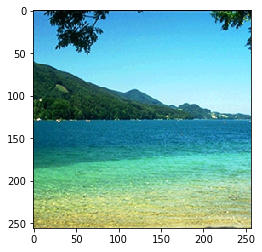

In [12]:
print("The img1")
plt.imshow(plt.imread(img1))


merger vision of img1


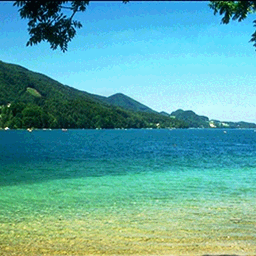

In [13]:
print("merger vision of img1")
merged_image

The img2


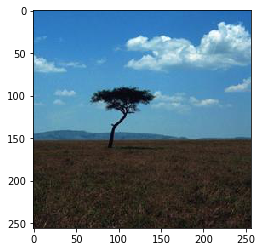

In [14]:
print("The img2")
plt.imshow(plt.imread(img2))

Unmerger vision of img2


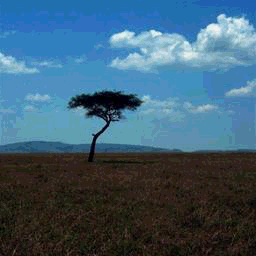

In [15]:
print("Unmerger vision of img2")
unmerged_image

# 2. Evaluation of the loss function for given dataset

### 2.1 load the dataset the resize the image to 64*64

In [0]:
basewidth = 64
for i in range(24):
    i = i+1
    if (i<10):
        img = Image.open('Kodak Lossless True Color Image Suite/kodim0'+str(i)+'.png')
        img = img.resize((basewidth,basewidth), Image.ANTIALIAS)
        img.save('Kodak Lossless True Color Image Suite_resize/kodim0'+str(i)+'_resize.png') 
    else:
        img = Image.open('Kodak Lossless True Color Image Suite/kodim'+str(i)+'.png')
        img = img.resize((basewidth,basewidth), Image.ANTIALIAS)
        img.save('Kodak Lossless True Color Image Suite_resize/kodim'+str(i)+'_resize.png') 

### 2.2 Permute the images to cover_image_set and hidden_image_set

In [0]:
order = (np.random.choice(24, 24, replace=False)+1).reshape(2,-1)
cover_order = order[0]
hidden_order = order[1]
for i in cover_order:
    if (i<10):
        directory = 'kodim0'+str(i)+'_resize.png'
    else:
        directory = 'kodim'+str(i)+'_resize.png'

    img = Image.open('Kodak Lossless True Color Image Suite_resize/'+directory)
    img.save('Kodak Lossless True Color Image Suite_resize/cover_img/'+directory) 
    
for i in hidden_order:
    if (i<10):
        directory = 'kodim0'+str(i)+'_resize.png'
    else:
        directory = 'kodim'+str(i)+'_resize.png'

    img = Image.open('Kodak Lossless True Color Image Suite_resize/'+directory)
    img.save('Kodak Lossless True Color Image Suite_resize/hidden_img/'+directory) 
    
    

### 2.2 computer the value of loss function
$$\min_{E, D} \|x - E(x,y)\| + \gamma \|y - D(z)\|$$

In [0]:
import os

directory_in_str_hiddenimge = 'Kodak Lossless True Color Image Suite_resize/hidden_img/'
directory_in_str_coverimge = 'Kodak Lossless True Color Image Suite_resize/cover_img/'

directory = os.fsencode(directory_in_str_coverimge)
x_Exy_list = []
y_D_list = []
name_str = []
for file1 in os.listdir(directory):
    filename1 = os.fsdecode(file1)
    directory_coverimge = directory_in_str_coverimge+filename1
    img1 = directory_coverimge
    directory = os.fsencode(directory_in_str_hiddenimge)
    for file2 in os.listdir(directory):
        filename2 = os.fsdecode(file2)
        directory_hiddenimge = directory_in_str_hiddenimge+filename2
        img2 = directory_hiddenimge
        merged_image = Steganography.merge(Image.open(img1), Image.open(img2))
        x_Exy = np.sqrt(np.mean(np.linalg.norm(np.array(Image.open(img1)) - np.array(merged_image),axis = 2)))
        x_Exy_list.append(x_Exy)
        unmerged_image = Steganography.unmerge(merged_image)
        y_D = np.sqrt(np.mean(np.linalg.norm(np.array(Image.open(img2)) - np.array(unmerged_image),axis = 2)))
        y_D_list.append(y_D)
        name_str.append('cover_'+filename1+'_hidden_'+filename2)
        scipy.misc.imsave('Kodak Lossless True Color Image Suite_resize/merger_img/cover_'+filename1+'_hidden_'+filename2, merged_image)
        scipy.misc.imsave('Kodak Lossless True Color Image Suite_resize/unmerger_img/cover_'+filename1+'_hidden_'+filename2, unmerged_image)
        

    



D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [0]:
import pandas as pd
loss = np.array(x_Exy_list)+np.array(y_D_list)
df2 = pd.DataFrame({'x minus Exy': x_Exy_list,
                    'y miun Dy': y_D_list,
                    'loss':loss
             })
df2.index = np.array(name_str)
df2


,x minus Exy,y miun Dy,loss
cover_kodim02_resize.png_hidden_kodim01_resize.png,15.486895,3.818751,19.305646
cover_kodim02_resize.png_hidden_kodim05_resize.png,13.459796,3.828412,17.288207
cover_kodim02_resize.png_hidden_kodim06_resize.png,16.647347,3.894008,20.541355
cover_kodim02_resize.png_hidden_kodim07_resize.png,15.536948,3.841210,19.378158
cover_kodim02_resize.png_hidden_kodim08_resize.png,16.193772,3.809148,20.002920
cover_kodim02_resize.png_hidden_kodim11_resize.png,14.529602,3.885967,18.415569
cover_kodim02_resize.png_hidden_kodim17_resize.png,13.279906,3.858990,17.138896
cover_kodim02_resize.png_hidden_kodim18_resize.png,12.546126,3.817614,16.363740
cover_kodim02_resize.png_hidden_kodim19_resize.png,15.741124,3.854145,19.595269
cover_kodim02_resize.png_hidden_kodim20_resize.png,17.690050,4.314260,22.004310


In [0]:
print("ave loss for merge image:",np.mean(x_Exy_list))
print("ave loss for unmerge image:",np.mean(y_ nnnnnnnnnnnnD_list))
print("ave loss for total loss:",np.mean(loss))

ave loss for merge image: 14.869128421059846
ave loss for unmerge image: 3.8857086277797603
ave loss for total loss: 18.754837048839605


We find that over the entire kodak set our average loss is somewhat high, actually higher than the neural network. Howver, the image, to the human eye, is a closer resemblence of the original image. 

A fundamental flaw in this would be that the true loss would be how difficult it would be for a human to make up what the original image was supposed to be.

# Optional Task:

Both LSB and NN can't recover multi-image merge. LSB only replaces last 4 digits so the second time we recover the image we will get black images rather than anything else. NN will fail as well because a Convolution Neural Net would not find the statistical pattern of merged image since the merger image is not natural so the gradient function of the image is hard for NN to catch up. 